In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import hvplot.pandas
import numpy as np


# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [3]:
coffee_price = pd.read_csv('../Data/Raw/global_price_of_coffee.csv')
coffee_price.head()

,DATE,PCOFFOTMUSDM
0,1990-01-01,75.829987
1,1990-02-01,84.010010
2,1990-03-01,93.959991
3,1990-04-01,93.730011
4,1990-05-01,92.019989


In [4]:
# Change DATE to datetime dtype
coffee_price['DATE'] = pd.to_datetime(coffee_price['DATE'])
# Filter to only the year 
coffee_price['Years'] = coffee_price['DATE'].dt.year

# Groupby Year to average the respective months of coffee prices
average_price_by_year = coffee_price.groupby('Years')['PCOFFOTMUSDM'].mean().round(2)

# Reset index
coffee_prices = average_price_by_year.reset_index()

# Change name of PCOFFOTMUSDM
coffee_prices = coffee_prices.rename(columns={'PCOFFOTMUSDM':'Global Price of Coffee (US cents per lb)'})

coffee_prices


,Years,Global Price of Coffee (US cents per lb)
0,1990,89.15
1,1991,85.03
2,1992,61.74
3,1993,71.12
4,1994,147.35
5,1995,150.83
6,1996,121.97
7,1997,188.93
8,1998,135.47
9,1999,103.88


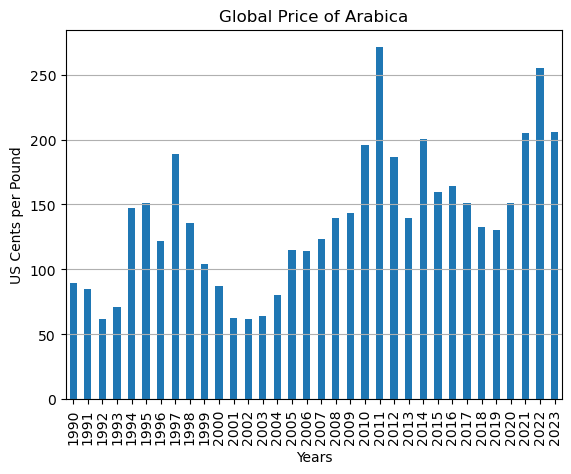

In [5]:
coffee_prices.plot.bar(x="Years", y="Global Price of Coffee (US cents per lb)",legend=None)
x_axis=np.arange(1990,2024,1)
y_axis=np.arange(0,300,25)
plt.grid(axis='y')
plt.title("Global Price of Arabica")
plt.ylabel("US Cents per Pound")
plt.show()

In [6]:
coffee_prices["Global Price of Coffee (US cents per lb)"].describe()

count     34.000000
mean     138.092647
std       53.856117
min       61.460000
25%       92.832500
50%      137.475000
75%      162.855000
max      271.110000
Name: Global Price of Coffee (US cents per lb), dtype: float64

In [7]:
prices_agg = coffee_prices.agg([np.mean,np.median,np.max,np.min])
prices_agg = prices_agg.drop(columns="Years", axis=1)
prices_agg

,Global Price of Coffee (US cents per lb)
mean,138.092647
median,137.475000
amax,271.110000
amin,61.460000


In [83]:
# Save to .csv in cleaned folder
coffee_prices.to_csv('../Data/Cleaned/coffee_prices.csv')